In [ ]:
"""Explanation VideomLink:- https://drive.google.com/file/d/1A2QOWxQScFxAk3DRQjqA0v6uePF51EWm/view?usp=sharing"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Airbnb_data.csv')

1. Data Exploration and Preprocessing

 o Analyze the dataset for trends, missing values, and outliers.

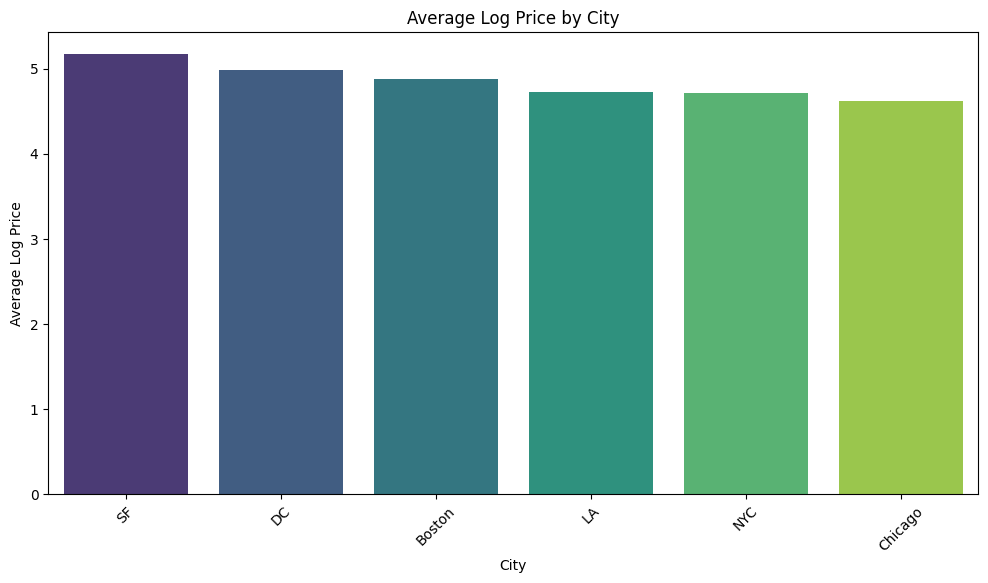

In [3]:
# here I analyse the trend for price by city
plt.figure(figsize=(12, 6))
city_trends = df.groupby('city')['log_price'].mean().sort_values(ascending=False)
sns.barplot(x=city_trends.index, y=city_trends.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Log Price by City')
plt.xlabel('City')
plt.ylabel('Average Log Price')
plt.show()

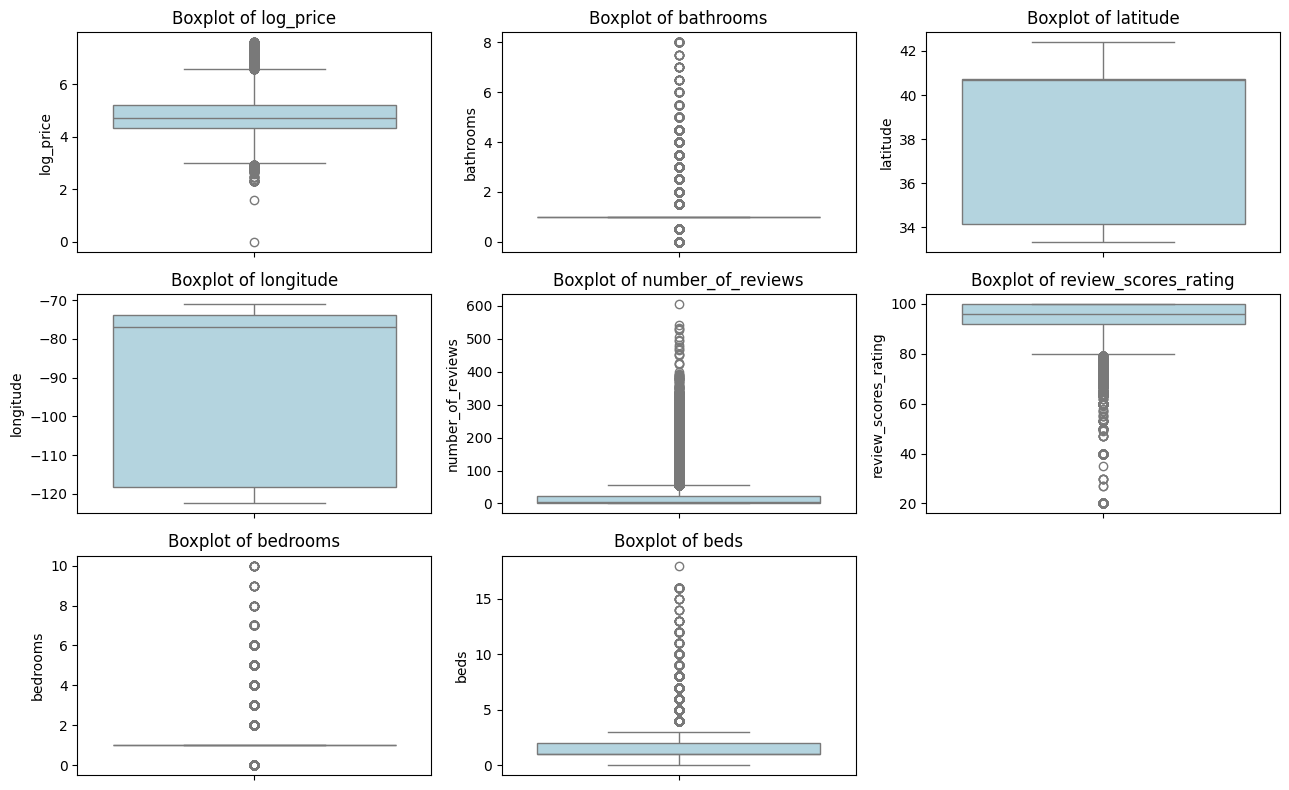

In [4]:
#here I tried to find the outliers
numeric_columns = ['log_price', 'bathrooms', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
plt.figure(figsize=(13, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [5]:
#here i found the missing values and print if they exixt
def missing_values(df):
    missing = df.isnull().sum()
    return missing[missing > 0]

print("Missing Values:")
print(missing_values(df))

Missing Values:
bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


o Perform data cleaning, feature engineering, and transformations.

In [6]:
# here I handele the missing value by putting median value and Unknown 
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['cleaning_fee'].fillna(False, inplace=True)
df['first_review'].fillna("Unknown", inplace=True)
df['host_has_profile_pic'].fillna('f', inplace=True)

In [7]:
# Drop unnecessary columns like 'id', 'description', and 'amenities'
df.drop(['id', 'description', 'amenities','first_review', 'host_has_profile_pic', 'host_identity_verified','host_response_rate','host_since','instant_bookable','last_review','name','neighbourhood','thumbnail_url','zipcode'], axis=1, inplace=True)

In [8]:
# here I handele the missing value by putting median value
df['review_scores_rating'].fillna(df['review_scores_rating'].median(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)

In [14]:
label_encoder = LabelEncoder()
categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

In [15]:
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

 2. Model Development

o Build a regression model to predict listing prices.

In [16]:
X = df.drop(['log_price'], axis=1)
y = df['log_price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

 3. Model Evaluation

 o Evaluate the model’s performance using appropriate metrics like RMSE,
 MAE, and R².

In [21]:
#prediction
y_pred = lr_model.predict(X_test)
# Evaluate the model
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 0.3686043996519387
Root Mean Squared Error (RMSE): 0.2394261838738615
R^2 Score: 0.5339417682839561


In [22]:
df.describe()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,city,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,4.782069,5.765973,0.471779,3.155146,1.234628,3.935192,1.136336,3.292629,38.445958,-92.397525,20.900568,94.503434,1.265467,1.709611
std,0.717394,8.617349,0.554599,2.153589,0.581386,0.424104,0.854733,1.181851,3.080167,21.705322,37.828641,6.943159,0.851671,1.253389
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,4.317488,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000,3.000000,34.127908,-118.342374,1.000000,93.000000,1.000000,1.000000
50%,4.709530,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,4.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,5.220356,17.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,40.746096,-73.954660,23.000000,99.000000,1.000000,2.000000
max,7.600402,34.000000,2.000000,16.000000,8.000000,4.000000,4.000000,5.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000
